In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 42
rc('text', usetex=True)
%matplotlib inline

In [26]:
def load_data(parent_dir, ps, ks, ss, ts, ms):
    """[プロットするデータを読み込む]

    Args:
        parent_dir (string): [target string  dir]. Required.
        ps: (array): [Number of Process]. Required.
        ks: (array): [Value of k]. Required.
        ts: (array): [Pre-Conditioning Type]. Required.
        ss: (array): [Matrix row(col) size]. Required.
        ms: (array): [Method Type]. ('kskipmrr', 'adaptivekskipmrr') Required.
    """

    arr = []
    for p in ps:
        for k in ks:
            for s in ss:
                for t in ts:
                    for m in ms:
                        d = f'{parent_dir}/{m}_{t}{s}_k{k:02d}_gpu{p}'
                        arr.append({
                            'nosu': np.load(f'{d}/nosl.npy'), 
                            'residual': np.load(f'{d}/residual.npy'), 
                            'time': np.load(f'{d}/time.npy'),
                            'method': m,
                            'type': t,
                            'size': s,
                            'k': k,
                            'pu': p
                        })
                        try:
                            arr[-1]['kbt'] = np.load(f'{d}/kbt.npy')
                        except Exception as e:
                            print('Not Exsist kbt.npy File')
                        if m is 'adaptivekskipmrr':
                            arr[-1]['khistory'] = np.load(f'{d}/khistory.npy')
    return arr

In [27]:
def plot_nosu_residual(figsize=(16,12), fontsize=42, legend_fontsize=24, savefig=False, **kwargs):
    """[線形グラフをプロットする]]

    Args:
        data (array): [data]. Required. included label
        ncol: [legend column size]. Required.
        xlim (tuple): [xlim]. Required
        ylim (tuple): [ylim]. Required
        figsize (tuple): [figsize]. Defaults to '(16, 12)'.
        fontsize (int): [fontsize]. Defaults to 42. 
        legend_fontsize (int): [legend fontsize]. Defaults to 24. 
        savefig (boolean): [savefig]. Defaults to false.
        filename (string): [savefile]. Defaults to ''.
    """

    plt.figure(figsize=figsize)
    plt.rcParams["font.size"] = fontsize
    plt.yscale('log')
    plt.grid()
    plt.xlabel('Number of Solution Updates')
    plt.ylabel('Residual Norm')
    plt.xlim(kwargs['xlim'])
    plt.ylim(kwargs['ylim'])
    for i, d in enumerate(kwargs['data']):
        label=f'{d["method"]} {d["k"]} {d["pu"]}'
        plt.plot(d['nosu'], d['residual'], '-o', linewidth=1, label=label, markersize=1)
    plt.legend(ncol=kwargs['ncol'], fontsize=legend_fontsize)

    if savefig:
        plt.savefig(kwargs['filename'])
    else:
        plt.show()       

In [31]:
def plot_nosu_k(figsize=(16,12), fontsize=42, legend_fontsize=24, savefig=False, **kwargs):
    """[線形グラフをプロットする]]

    Args:
        data (array): [data]. Required. included label
        ncol: [legend column size]. Required.
        xlim (tuple): [xlim]. Required
        ylim (tuple): [ylim]. Required
        figsize (tuple): [figsize]. Defaults to '(16, 12)'.
        fontsize (int): [fontsize]. Defaults to 42. 
        legend_fontsize (int): [legend fontsize]. Defaults to 24. 
        savefig (boolean): [savefig]. Defaults to false.
        filename (string): [savefile]. Defaults to ''.
    """

    plt.figure(figsize=figsize)
    plt.rcParams["font.size"] = fontsize
    plt.grid()
    plt.xlabel('Number of Solution Updates')
    plt.ylabel('$k$')
    plt.xlim(kwargs['xlim'])
    plt.ylim(kwargs['ylim'])
    for i, d in enumerate(kwargs['data']):
        label=f'{d["method"]} {d["k"]} {d["pu"]}'
        plt.plot(d['nosu'], d['khistory'], '-o', linewidth=1, label=label, markersize=1)
    plt.legend(ncol=kwargs['ncol'], fontsize=legend_fontsize)

    if savefig:
        plt.savefig(kwargs['filename'])
    else:
        plt.show()       

In [32]:
ms = ['adaptivekskipmrr']
ts = ['reduced']
ss = ['10601']
ks = [0, 1, 3, 5, 7]
ps = [1, 2, 4, 8 ,16]

In [33]:
data = load_data(
    '../test/data/20201109_04/', 
    ps,
    ks,
    ss,
    ts,
    ms
)

In [ ]:
def bar_k_elapsed_time(figsize=(16,12), fontsize=42, legend_fontsize=24, savefig=False, **kwargs):

    w = 0.166
    plt.figure(figsize=figsize)
    plt.rcParams["font.size"] = fontsize
    plt.xlabel('$k$')
    plt.ylabel('Elapsed Time (second)')
    plt.xlim(kwargs['xlim'])
    plt.ylim(kwargs['ylim'])
    plt.subplots_adjust(left=0.15, right=0.90, bottom=0.15, top=0.90)
    tkmrr = []; takmrr = []; tkmrr_cpu = []; takmrr_cpu = []
    l_ks = [0, 5, 10]
    l = len(l_ks)
    for k in l_ks:
        tkmrr.append(res_kmrr[k]['time'])
        takmrr.append(res_akmrr[k]['time'])
        tkmrr_cpu.append(np.load(f'{d}/cpu/kskipmrr/{k:02d}/time.npy'))
        takmrr_cpu.append(np.load(f'{d}/cpu/adaptivekskipmrr/{k:02d}/time.npy'))

    plt.bar(0, res_mrr['time'], color=(0.75,0.25,0.25), width=w, align='center', tick_label=[0], label="MrR (GPU)")
    plt.bar(w, np.load(f'{d}/cpu/mrr/time.npy'), color=(0.5,0,0.2), width=w, align='center', tick_label=[0], label="MrR (CPU)")

    plt.bar(np.arange(l)+(w*2), tkmrr, width=w, align='center', color=(0.25,0.75,0.25), tick_label=l_ks, label="$k$-skip MrR (GPU)")
    plt.bar(np.arange(l)+w * 3, tkmrr_cpu, width=w, align='center', color=(0.1,0.5,0.1), tick_label=l_ks, label="$k$-skip MrR (CPU)")

    plt.bar(np.arange(l)+w*4, takmrr, width=w, align='center', color=(0.25,0.25,0.75), tick_label=l_ks, label="adaptive $k$-skip MrR (GPU)")
    plt.bar(np.arange(l)+w*5, takmrr_cpu, width=w, align='center', color=(0.2,0,0.5), tick_label=l_ks, label="adaptive $k$-skip MrR (CPU)")


    plt.legend(ncol=3, fontsize=22)
    # plt.show()
    plt.savefig('./img/gpuvscpu.png')

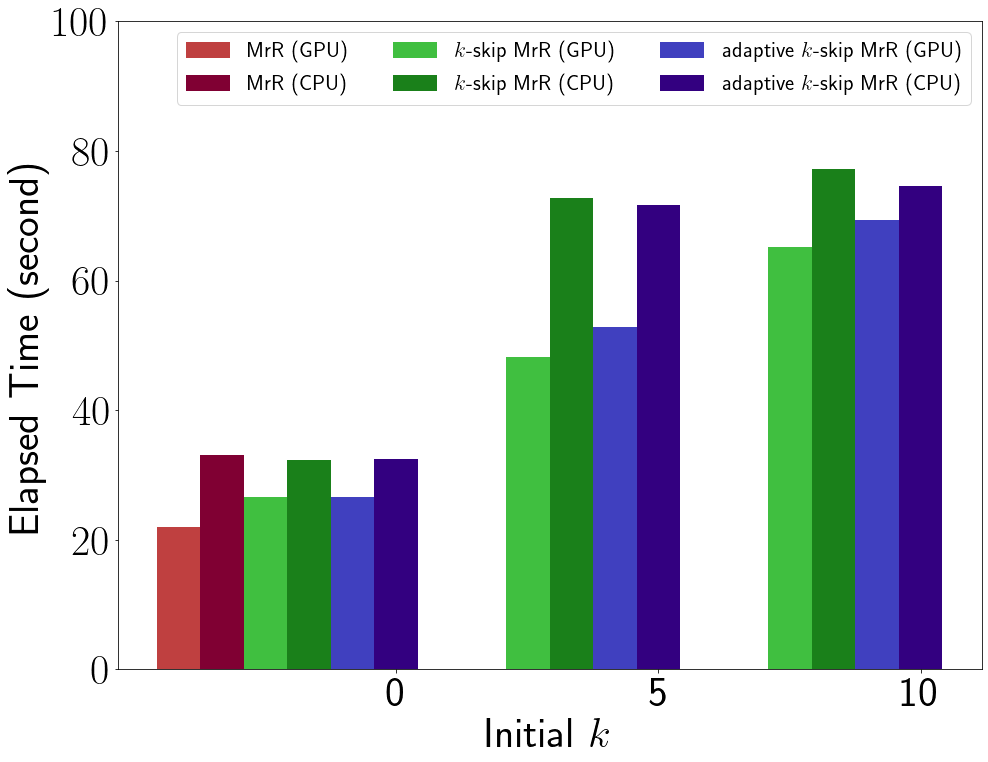

In [8]:
w = 0.166
plt.rcParams["font.size"] = 42
plt.figure(figsize=(16, 12))
plt.xlabel('Initial $k$')
plt.ylabel('Elapsed Time (second)')
plt.ylim(0, 100)
plt.subplots_adjust(left=0.15, right=0.90, bottom=0.15, top=0.90)
tkmrr = []; takmrr = []; tkmrr_cpu = []; takmrr_cpu = []
l_ks = [0, 5, 10]
l = len(l_ks)
for k in l_ks:
    tkmrr.append(res_kmrr[k]['time'])
    takmrr.append(res_akmrr[k]['time'])
    tkmrr_cpu.append(np.load(f'{d}/cpu/kskipmrr/{k:02d}/time.npy'))
    takmrr_cpu.append(np.load(f'{d}/cpu/adaptivekskipmrr/{k:02d}/time.npy'))

plt.bar(0, res_mrr['time'], color=(0.75,0.25,0.25), width=w, align='center', tick_label=[0], label="MrR (GPU)")
plt.bar(w, np.load(f'{d}/cpu/mrr/time.npy'), color=(0.5,0,0.2), width=w, align='center', tick_label=[0], label="MrR (CPU)")

plt.bar(np.arange(l)+(w*2), tkmrr, width=w, align='center', color=(0.25,0.75,0.25), tick_label=l_ks, label="$k$-skip MrR (GPU)")
plt.bar(np.arange(l)+w * 3, tkmrr_cpu, width=w, align='center', color=(0.1,0.5,0.1), tick_label=l_ks, label="$k$-skip MrR (CPU)")

plt.bar(np.arange(l)+w*4, takmrr, width=w, align='center', color=(0.25,0.25,0.75), tick_label=l_ks, label="adaptive $k$-skip MrR (GPU)")
plt.bar(np.arange(l)+w*5, takmrr_cpu, width=w, align='center', color=(0.2,0,0.5), tick_label=l_ks, label="adaptive $k$-skip MrR (CPU)")


plt.legend(ncol=3, fontsize=22)
# plt.show()
plt.savefig('./img/gpuvscpu.png')